# DATA CHARACTERIZATION AND DESCRIPTION
by Gary T. Banta (origional) and Ulf R. Pedersen (notebook version)

When we scientifically observe measure and quantitatively describe the world around us, we
collect and note these observations in the form of data. Researchers carry out investigations in
various settings: in the clinic, in the laboratory, in the greenhouse, in the field, etc. As such, the
type of data that is collected differs also in its characteristics.

The purpose of this chapter is to
introduce you more systematically to what data is. More specifically, we will examine various
types of commonly observed data and their characteristics. Furthermore, we will examine
techniques for how to describe and display such data.

## Where does data come from?
As indicated above there are many possible sources of data, but it is worth thinking more
critically about the source of the data. This will be important for both understanding the nature of
the data as well as what it may or may not “tell you” about the phenomena you are observing.

One of the most important distinctions is whether data is acquired from an **observational study**
or an **experiment**. In an observational study, data is systematically collected data by a researcher,
but only as an observer and not as someone who has manipulated conditions. Hopefully these
observations are made in a scientifically sound manner, and by systematically examining all the
data that arise in observational studies one can guard against selective interpretation or bias. 

An example of data from an observational study about Monoamine oxidase (MAO) activity
(expressed as nmol benzylaldehyde product per 108 platelets per hour) and schizophrenia can be
seen in Table 1 (also plotted in Figure 1, but more on that type of plot next time). MAO is an
enzyme that is thought to play a role in the regulation of behavior and in order to see whether
different categories of schizophrenic patients have different levels of MAO activity, researchers
collected blood specimens from 42 patients and measured the MAO activity in the platelets.

<center> <b>Table I:</b> MAO activity in schizophrenic patients.</center>

| Diagnostic Group | MAO activity |
|:-----------------|:-------------|
| Group I (18 patients): | 6.8 4.1 7.3 14.2 18.8 9.9 7.4 11.9 5.2 7.8 7.8 8.7 12.7 14.5 10.7 8.4 9.7 10.6 | 
| Group II (16 patients):| 7.8 4.4 11.4 3.1 4.3 10.1 1.5 7.4 5.2 10.0 3.7 5.5 8.5 7.7 6.8 3.1 |
| Group III (8 patients):| 6.4 10.8 1.1 2.9 4.5 5.8 9.4 6.8 |

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

def dot_plot(df):
    ''' Make a dot-plot of a Pandas dataframe '''
    from numpy import ones
    from matplotlib.pyplot import xticks
    for idx, label_series in enumerate(df.iteritems()):
        label, series = label_series
        plt.plot(ones(len(series))*idx, series, 'o')
    xticks(range(df.ndim+1),df.columns)

In [2]:
# Table 1: MAO activity in schizophrenic patients.
group_I = pd.Series([6.8, 4.1, 7.3, 14.2, 18.8,
                     9.9, 7.4, 11.9, 5.2, 7.8,
                     7.8, 8.7, 12.7, 14.5, 10.7,
                     8.4, 9.7, 10.6], 
                    name='Group I')
group_II = pd.Series([7.8, 4.4, 11.4, 3.1, 4.3,
                      10.1, 1.5, 7.4, 5.2, 10.0,
                      3.7, 5.5, 8.5, 7.7, 6.8,
                      3.1], 
                     name='Group II')
group_III = pd.Series([6.4, 10.8, 1.1, 2.9, 4.5,
                       5.8, 9.4, 6.8], 
                      name='Group III')
table_1 = pd.concat([group_I, group_II, group_III], axis=1)

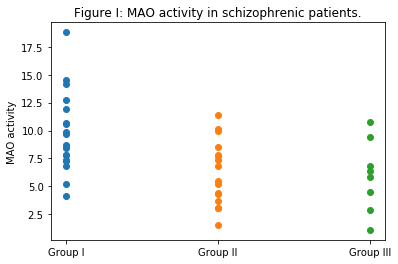

In [3]:
# Figure 1: MAO activity in schizophrenic patients
plt.title('Figure I: MAO activity in schizophrenic patients.')
plt.ylabel('MAO activity')
dot_plot(table_1)

Many possible questions can be asked about such data, including probably the most interesting
one from a biological point of view: is there any relationship between MAO activity and
schizophrenia? But in order to address that question, we must consider many things, including
how do we summarize or characterize this data in order to compare groups, for example. To
interpret the results of such comparisons we need also to consider the origin and context of the
data that was collected. Observational studies can be misleading due to confounding variables.
Confounding variables are other variables that the researcher has not observed or measured, but
that affect the results seen.

Before interpreting such data, a researcher should be considering
questions such as: How were the patients selected? Were they chosen from a common hospital
population, or were the three groups obtained at different times or places? Were precautions
taken so that the person measuring the MAO was unaware of the patient's diagnosis? Did the
investigators consider various ways of subdividing the patients before choosing the particular
diagnostic categories used in Table 1? At first glance, these questions may seem irrelevant. Don’t
the measurements speak for themselves?

We will see, however, that the proper interpretation of
data always requires careful consideration of how the data were obtained. One should be
concerned with the occurrence of bias in terms of how data were selected and in terms of how
they were interpreted. Furthermore, observational studies can only reveal patterns or
relationships that are observed, but, due the possibility of unknown factors that were not
measured or controlled, that these patterns are in fact due to other, confounding variables. As
such, the interpretation of data from an observational study must be considered indicative and
not definitive. This is sometimes referred to as “soft” statistical inference as opposed to “hard”
inference (as is more the case with experimental studies).

An **experiment** is distinguished from an observational study in that the researcher imposes an
experimental condition (or several) on the subjects (or experimental units) of the study in a
controlled and deliberate manner to test the effect of the manipulated condition. In a proper
experiment, all other (confounding) factors should be randomly distributed among the groups of
subjects or experimental units in a way that they do not affect the net result of the experiment.
Therefore, any observable effect in the experiment can be attributed to the experimental
manipulation and not to other, confounding variables. This increases the strength of the
interpretation of the results of an experiment; i.e., to that of “hard” inference. An example of
such an experiment is seen in Table 2 and Figure 2 where researchers investigated whether
flooding affects metabolism (measured as adenosine triphosphate, ATP, levels) in the roots of
birch tree saplings. This was a true experiment in the sense that birch tree saplings were
randomly assigned to and grown under the conditions of one of the two treatments – flooded or
control (i.e., not flooded), after which the ATP concentrations were determined. Because this is a
true experiment, with random assignment of the experimental units (birch seedlings) to the
treatments, one can now more directly interpret any observed differences as due to the effect of
flooding or not. Here it appears that metabolism (=ATP concentration) is lower in flooded roots
than in control roots and the logical conclusion is that flooding does in fact have an inhibitory
effect on root metabolism.

In [4]:
# Table 2: ATP concentration in birch tree roots
s1 = pd.Series([1.45, 1.19, 1.05, 1.07], name='Flooded')
s2 = pd.Series([1.70, 2.04, 1.49, 1.91], name='Control')
table_2 = pd.concat([s1, s2], axis=1)
table_2

Flooded  Control
0     1.45     1.70
1     1.19     2.04
2     1.05     1.49
3     1.07     1.91

(-0.5, 1.5)

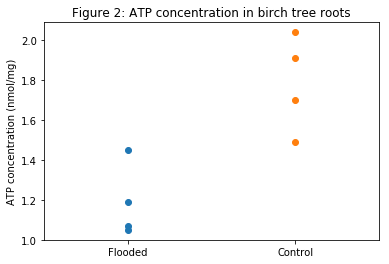

In [9]:
# Figure 2: ATP concentration in birch tree roots
plt.title('Figure 2: ATP concentration in birch tree roots')
dot_plot(table_2)
plt.ylabel('ATP concentration (nmol/mg)')
plt.xlim(-0.5,1.5)

Considering the birch root data again, the conclusion about there being a difference in ATP
levels seems quite safe; all of the ATP levels for the control group are higher than those from the
flooded group. All the values are not the same, however, indicating that there is variation in the
observed data. Such variation is an inherent feature of many type of quantitative observations
and dealing with (i.e., describing or making decisions based on) this variation lies at the heart of
the mathematical discipline of statistics. Statistics, which we only introduce you to in this course,
gives you the tools to help describe, interpret and draw conclusions from variable data. Using
statistics, it would be possible to test whether the observed differences in root metabolism were
likely to be due to the differences in root treatment or whether they could just as well be due to
chance observations. But more on that in another course...


In both types of studies, and with all data in general, it is important to recognize the
experimental or observational unit (i.e. the thing that the measurements or data come from)
and the nature of the data structure. For example have you measured or observed only one thing
per unit (e.g., whether they are male or female, or their color) or have you a number of
observations and/or measurements from each unit (e.g., height, weight, age and city for a number
of patients). Also, please do not be confused by the word “unit” in this context. Here we mean
the unit (i.e., thing) that is observed or measured to provide data. In the case of an experiment,
this is the thing that is manipulated. It is not the units of measure (i.e., kg, cm, number).

## Types of variables
So far we have considered the source and design structure of data and made some considerations
about the interpretations that may be made from such data. But let’s look at the nature of the
observations (i.e., the data) themselves. What kinds of variables can we expect to encounter in
the Natural Sciences? A variable is a characteristic of a person or thing that can be “measured”
and afterwards assigned a number or a category. For example, blood type (A, B, AB, 0) and age
are two variables we might measure on a person who is the subject (or unit) of study.

Blood type is an example of a **categorical variable**. A categorical variable is a variable that
records which of several categories a person or thing is in. Examples of categorical variables are

* Blood type of a person: A, B, AB, 0
* Sex: male, female
* Color of a flower: red, pink, white
* Shape of a seed: wrinkled, smooth

The measurement of each subject or object is thus assessing to which category that subject
belongs.

In some cases, the categories can be arrayed in a meaningful rank order. Such a categorical
variable is said to be **ordinal**. For example, the response of a patient to therapy might be none,
partial, or complete. Or the size of fish may be categorized as small, medium and large. If there
is some kind of natural order in the categories of a variable, then it can be considered ordinal and
as such assigning a subject to one versus another category contains more information than simply
a difference between two groups. There is a difference in order (size, value, etc.) implied.

In contrast to categorical (and ordinal) variables, it is often possible to give a numerical value to
the phenomena you are measuring. This leads to **numeric variables** which can be further
divided depending on the nature of the numerical value. A **continuous** variable can achieve a
numerical value on a continuous scale, i.e., all numbers (within a range at least) are possible.
Examples of continuous variables are:
* Weight of a baby
* Cholesterol concentration in a blood specimen
* Light absorption of a solution

While it is quite possible that two observations from a continuous variable may be close to each
other, it is quite unlikely that they will have exactly the same value given that all possible values
are possible. This situation is different for **discrete** variables. For discrete variables the numeric
values of observations can only fall on certain, discrete values. Observations between these
values are not (theoretically) possible. Examples of discrete variables could be:
* Number of eggs in a bird’s nest
* Number of bacteria colonies in a petri dish
* Length of a DNA segment in base pairs

In practice it may be difficult at times to distinguish between discrete and continuous variables,
especially because we are often limited to specific, discrete values by our measurement
technique (e.g., the mm scale on a ruler), even for continuous variables. Despite this practical
similarity, there is, however, a fundamental, theoretical difference between these two variable
4types that is important to identify. For example it is not theoretically possible to have 31⁄2 eggs in
a bird’s nest, but it is possible that the length of a flea could be 3.54 mm (even though we only
can measure it to 3.5 mm with our ruler). This theoretical difference in numeric variable types is
important as it determines the type of mathematical models and theory that are used to describe
and characterize observations. You will meet this difference later in the course when we talk
about the binomial and normal probability distributions.


### References
Samuels, ML, JA Witmer and A Schaffner, 2012. Statistics for the Life Sciences, 4/E. Pearson.